# TEST NO PARAMÉTRICOS CON PYTHON

Importando librerías necesarias

In [1]:
# librerías de apoyo
import pandas as pd
import numpy as np
import math
# librerías especializadas
from scipy import stats
import statsmodels.api as sm
#librerías de visualización
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import zipfile

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 300)

Carga de datos

In [3]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# Obtención del Dataframe
z = urlopen(url)
myzip = ZipFile(BytesIO(z.read())).extract('student-mat.csv')
students_df = pd.read_csv(myzip, sep=';')
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

***Source:***

Paulo Cortez, University of Minho, GuimarÃ£es, Portugal

***Data Set Information:***

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

***Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:***

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2th 5th to 9th grade, 3th secondary education or 4th higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2th 5th to 9th grade, 3th secondary education or 4th higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

***These grades are related with the course subject, Math or Portuguese:***

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

## Prueba de Normalidad: 
Evaluemos el supuesto de normalidad de la distribución de las variables

In [5]:
import pingouin as pg
pg.normality(students_df, method='shapiro', alpha=0.05).round(4)

,W,pval,normal
age,0.9106,0.0,False
Medu,0.8610,0.0,False
Fedu,0.8755,0.0,False
traveltime,0.6592,0.0,False
studytime,0.8342,0.0,False
failures,0.5071,0.0,False
famrel,0.8302,0.0,False
freetime,0.9061,0.0,False
goout,0.9100,0.0,False
Dalc,0.5978,0.0,False


https://pingouin-stats.org/generated/pingouin.normality.html

In [6]:
# Función de decisión del test estadístico
def decision(pvalue, alpha):
    if pvalue < alpha:
        print('Decisión: Rechazar H0')
    else:
        print('Decisión: No Rechazar H0')       

___
***---> EN MACHINE LEARNING:***

Estas pruebas se utilizan a menudo para evaluar los scores del modelo, para confirmar que la diferencia de score entre los modelos de aprendizaje automático es significativa.
___

## Test de U Mann-Whitney: para comparación de 2 Medias independientes

La mediana del las calificaciones en el último trimestre es distinto para cada escuela (Gabriel Pereira - Mousinho da Silveira)

***Definamos*** --> 

$me_A$: mediana de las calificaciones del último trimestre de la escuela Gabriel Pererira 

$me_B$: mediana de las calificaciones del último trimestre de la escuela Mousinho da Silveira

   - H0: $me_A = me_B$ 
   - H1: $me_A \neq me_B$
   
   - Nivel de significación: $\alpha$ = 0.05
   
   
***RECHAZO DE H0:***
--> indica que hay evidencia estadística que sugiere que las muestras fueron extraídas de diferentes poblaciones, por lo que la diferencia entre las estimaciones de la muestra de los parámetros de la población, como las medias o las medianas, puede ser significativa.

In [7]:
alpha = 0.05
A = students_df[students_df['school'] == 'GP']['G3']
B = students_df[students_df['school'] == 'MS']['G3']
ph = stats.mannwhitneyu(A, B, use_continuity=True, alternative='two-sided')  # None, 'two-sided', 'less', 'greater'
print(ph, end='\n\n')
decision(ph[1], alpha)

MannwhitneyuResult(statistic=8956.0, pvalue=0.20018908349101516)

Decisión: No Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [8]:
stats.mannwhitneyu(A, B, use_continuity=True, alternative='greater')  # Unilateral derecha

MannwhitneyuResult(statistic=8956.0, pvalue=0.10009454174550758)

In [9]:
stats.mannwhitneyu(A, B, use_continuity=True, alternative='less')  # Unilateral izquierda

MannwhitneyuResult(statistic=8956.0, pvalue=0.9001475391069217)

___
**Observemos las estadísticas descriptivas de cada muestra de datos:**

In [10]:
A.describe()

count    349.000000
mean      10.489971
std        4.625397
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [11]:
B.describe()

count    46.000000
mean      9.847826
std       4.237229
min       0.000000
25%       8.000000
50%      10.000000
75%      12.750000
max      19.000000
Name: G3, dtype: float64

In [12]:
alpha = 0.05
ph = hp = stats.ttest_ind(A, B, equal_var=False)
print(ph, end='\n\n')
decision(ph[1], alpha)

Ttest_indResult(statistic=0.9555475253722291, pvalue=0.3431316933314036)

Decisión: No Rechazar H0


## Test de los Rangos con signo de Wilcoxon: comparación de 2 Medias dependientes o apareadas

La mediana de las calificaciones las calificaciones final aumentan respecto a las calificaciones iniciales.

***Definamos*** --> $me_1$: mediana de las calificaciones del primer trimestre - $me_3$: mediana de las calificaciones del tercer trimestre

   - H0: $me_3 \leq me_1$ 
   - H1: $me_3 > me_1$
   
   - Nivel de significación: $\alpha$ = 0.05
   
___
**Nota:** Para que esta prueba sea efectiva, requiere al menos 20 observaciones en cada muestra de datos.

In [15]:
alpha = 0.05

x1 = students_df['G1']
x3 = students_df['G3']
ph = hp = stats.wilcoxon(x1, x3, zero_method='wilcox', correction=True, alternative='greater', mode='auto')
print(ph, end='\n\n')
decision(ph[1], alpha)

WilcoxonResult(statistic=24374.5, pvalue=0.15764424824742884)

Decisión: No Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [16]:
print(f'Media y mediana de las calificaciones del primer trimestre: {x1.mean():.2f} - {x1.median()}\n')
print(f'Media y mediana de las calificaciones del tercer trimestre: {x3.mean():.2f} - {x3.median()}')

Media y mediana de las calificaciones del primer trimestre: 10.91 - 11.0

Media y mediana de las calificaciones del tercer trimestre: 10.42 - 11.0


---
---
***Observemos los resultados de aplicar un test estadístico paramétrico para este caso.***

In [17]:
ph = hp = stats.ttest_rel(x1, x3)
print(ph, end='\n\n')
decision(ph[1], alpha)

Ttest_relResult(statistic=3.5517031247185855, pvalue=0.00042906738658041643)

Decisión: Rechazar H0


## Tests para comparar 3 o más medias

### Test de Kruskal-Wallis (muestras independientes)

***Factor de agrupamiento:***

Medu - mother's education (numeric):
- 0 : none
- 1 : primary education (4th grade)
- 2 : 5th to 9th grade
- 3 : secondary education 
- 4 : higher education

**Nota:**
--
Debido a que el estadístico de prueba sigue una distribución Chi-Cuadrado, el número de muestras en cada grupo debe ser al menos 5.

In [18]:
students_df['Medu'].unique()

array([4, 1, 3, 2, 0], dtype=int64)

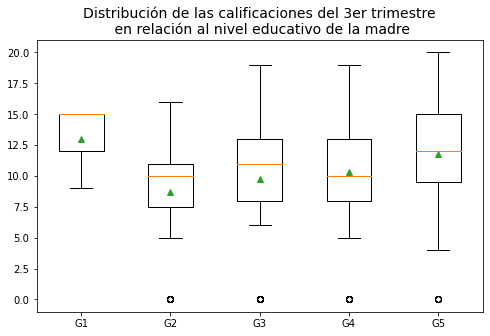

In [19]:
g1 = students_df[students_df['Medu'] == 0]['G3']
g2 = students_df[students_df['Medu'] == 1]['G3']
g3 = students_df[students_df['Medu'] == 2]['G3']
g4 = students_df[students_df['Medu'] == 3]['G3']
g5 = students_df[students_df['Medu'] == 4]['G3']

data = [g1, g2, g3, g4, g5]
plt.figure(figsize=(8, 5))
plt.title('Distribución de las calificaciones del 3er trimestre\n en relación al nivel educativo de la madre', fontsize=14)
plt.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3, 4, 5], ['G1', 'G2', 'G3', 'G4', 'G5'])
plt.show()

Los valores medianos de las calificaciones del 3er trimestre no difieren en relación al nivel educativo de la madre
   - H0: $me_1 = me_2 = me_3 = me_4 = me_5$ 
   - H1: Al menos una mediana es distinta
   
   - $\alpha$ = 0.05

In [20]:
alpha = 0.05
ph = stats.kruskal(g1, g2, g3, g4, g5)
print(ph, end='\n\n')
decision(ph[1], alpha)

KruskalResult(statistic=24.103910687505817, pvalue=7.613386492953157e-05)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

### Test Post-hoc de Dunn

No existe diferencias entre la mediana de las calificaciones del 3er trimestre no difieren en relación al nivel educativo de la madre

   - H0: $\mu_i = \mu_j$
   - H1: $\mu_i \neq \mu_j$
   
   - $\alpha$ = 0.05

In [21]:
# !pip install scikit_posthocs

In [22]:
import scikit_posthocs as sp
# data = 
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5
1,1.000000,0.954601,1.000000,1.000000,1.000000
2,0.954601,1.000000,0.944918,0.322175,0.000082
3,1.000000,0.944918,1.000000,1.000000,0.012039
4,1.000000,0.322175,1.000000,1.000000,0.091332
5,1.000000,0.000082,0.012039,0.091332,1.000000


**Interpretación:**

- P-value de la diferencia entre el grupo 1 y 2: 0.954601
- P-value de la diferencia entre el grupo 4 y 5: 0.091332
- P-value de la diferencia entre el grupo 3 y 5: 0.012039  ---> la mediana de ambos grupos es significativamente diferente a un nivel de 0.05


### Test de Friedman (muestras dependientes o apareadas)

***Factor de agrupamiento:***

Trimestres: G1 - G2 - G3

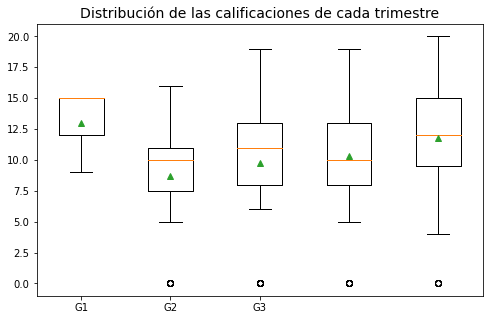

In [23]:
gc1 = students_df['G1']
gc2 = students_df['G2']
gc3 = students_df['G3']
data_group = [gc1, gc2, gc3]
plt.figure(figsize=(8, 5))
plt.title('Distribución de las calificaciones de cada trimestre', fontsize=14)
plt.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3], ['G1', 'G2', 'G3'])
plt.show()

No existe diferencias en la media de los valores de las viviendas en los surburbios de Boston con respecto a los grupos de ratio estudiantes/profesor.
   - H0: $me_1 = me_2 = me_3$
   - H1: Al menos una mediana es distinta
   
   - $\alpha$ = 0.05

In [24]:
alpha = 0.05
ph = stats.friedmanchisquare(gc1, gc2, gc3)
print(ph, end='\n\n')
decision(ph[1], alpha)

FriedmanchisquareResult(statistic=2.9598572702948927, pvalue=0.2276539342935665)

Decisión: No Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [25]:
students_df[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


## Tests de Comparación de Varianzas

### Test de Bartlett

Evaluemos la igualdad de varianza de las calificaciones de los 3 trimestres.

- H0: $\sigma^2_1 = \sigma^2_2 = \sigma^2_3$  (homecedasticidad)
   - H1: $\sigma^2_i \neq \sigma^2_j$ --> Al menos una varianza es distinta 
   
   - $\alpha$ = 0.10

In [26]:
alpha = 0.10

ph = stats.bartlett(gc1, gc2, gc3)
print(ph, end='\n\n')
decision(ph[1], alpha)

BartlettResult(statistic=42.15254753552011, pvalue=7.025716213905474e-10)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

### Test de Levene

Evaluemos la igualdad de varianza de las calificaciones de los 3 trimestres.

   - H0: $\sigma^2_1 = \sigma^2_2 = \sigma^2_3$  (homecedasticidad)
   - H1: $\sigma^2_i \neq \sigma^2_j$ --> Al menos una varianza es distinta 
   
   - $\alpha$ = 0.10

In [27]:
alpha = 0.10

ph = stats.levene(gc1, gc2, gc3)
print(ph, end='\n\n')
decision(ph[1], alpha)

LeveneResult(statistic=6.958197225481981, pvalue=0.0009902487246434177)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

## Tests de Bondad de Ajuste

Aplicación:
- Comparar los valores observados y los valores esperados en el modelo de estudio
- Comprobar si dos muestras se obtienen a partir de dos distribuciones idénticas
- Comprobar si las frecuencias siguen una distribución específica 

### Test de Kolmogorov-Smirnov

- Comprobar si dos muestras se obtienen a partir de dos distribuciones idénticas

   - H0: la distribución de las calificaciones del primer trimestre es igual a la del tercer trimestre
   - H1: la distribución de las calificaciones del primer trimestre NO es igual a la del tercer trimestre
   
   - $\alpha$ = 0.05

In [28]:
x = students_df['G1']
y = students_df['G3']
alpha = 0.05
ph = stats.kstest(x, y, alternative='two-sided', mode='auto')  # Compara la dist. de 2 variables
print(ph, end='\n\n')
decision(ph[1], alpha)

KstestResult(statistic=0.09620253164556962, pvalue=0.051633744066625374)

Decisión: No Rechazar H0


- Comprobar si las frecuencias siguen una distribución específica

   - H0: la distribución de las calificaciones del primer trimestre sigue una distribución normal
   - H1: la distribución de las calificaciones del primer trimestre NO sigue una distribución normal
   
   - $\alpha$ = 0.05

In [29]:
rvs = students_df['G1']
cdf = 'norm'   # Distribución teórica (Dist. Normal)
alpha = 0.05
ph = stats.kstest(rvs, cdf, alternative='two-sided', mode='auto')
print(ph, end='\n\n')
decision(ph[1], alpha)

KstestResult(statistic=0.9986501019683699, pvalue=0.0)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

- Otra manera:

In [30]:
ph = stats.ks_1samp(rvs, stats.norm.cdf)   # Compara dist. de 1 variable con una dist. teórica
print(ph, end='\n\n')
decision(ph[1], alpha)

KstestResult(statistic=0.9986501019683699, pvalue=0.0)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html

### Test de Shapiro Wilk

   - H0: la distribución de las calificaciones del primer trimestre sigue una distribución normal
   - H1: la distribución de las calificaciones del primer trimestre NO sigue una distribución normal
   
   - $\alpha$ = 0.05

In [31]:
ph = stats.shapiro(rvs)
print(ph, end='\n\n')
decision(ph[1], 0.05)

ShapiroResult(statistic=0.9749146103858948, pvalue=2.4554813080612803e-06)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

### Test de Bondad de Ajuste Chi-Cuadrado

Se utiliza para determinar si una variable categórica sigue o no una distribución hipotética.

**Variable:** Tiempo libre fuera de la escuela

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

La apreciación de la cantidad de tiempo libre fuera de la escuela tiene una distribución uniforme

   - H0: La evaluación de la cantidad de tiempo libre fuera de la escuela tiene una distribución uniforme
   - H1: La evaluación de la cantidad de tiempo libre fuera de la escuela NO tiene una distribución uniforme
   
   - $\alpha$ = 0.05

In [32]:
# Frecuencias observadas (porcentajes)
fobs = students_df['freetime'].value_counts().sort_index()/len(students_df)*100   # frecuencias absolutas, frecuencias relativas, porcentajes
fobs

1     4.810127
2    16.202532
3    39.746835
4    29.113924
5    10.126582
Name: freetime, dtype: float64

In [33]:
# Frecuencias observadas (porcentajes)
fesp = [1/5*100]*5
fesp

[20.0, 20.0, 20.0, 20.0, 20.0]

In [34]:
alpha = 0.05
ph = stats.chisquare(fobs, fesp)
print(ph, end='\n\n')
decision(ph[1], alpha)

Power_divergenceResult(statistic=40.78192597340169, pvalue=2.9822746053598564e-08)

Decisión: Rechazar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html